In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data/ANSUR_FEMALE.csv')
df.head()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Support,Regular Army,Female,231,1282,301,204,1180,222,177,...,217,345,942,152,756,65.7,1.560,26.997041,Overweight,Normal
1,Combat Service Support,Regular Army,Female,194,1379,320,207,1292,225,178,...,168,329,1032,155,815,53.4,1.665,19.262506,Normal,Normal
2,Combat Service Support,Regular Army,Female,183,1369,329,233,1271,237,196,...,159,367,1035,162,799,66.3,1.711,22.647148,Normal,Tall
3,Combat Service Support,Regular Army,Female,261,1356,306,214,1250,240,188,...,235,371,999,173,818,78.2,1.660,28.378575,Overweight,Normal
4,Combat Arms,Regular Army,Female,309,1303,308,214,1210,217,182,...,300,380,911,152,762,88.6,1.572,35.853259,Overweight,Normal


In [3]:
df.shape

(1986, 99)

In [4]:
df_numeric = df.select_dtypes(exclude='object')
df_numeric.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,231,1282,301,204,1180,222,177,373,315,263,...,295,850,217,345,942,152,756,65.7,1.560,26.997041
1,194,1379,320,207,1292,225,178,372,272,250,...,254,708,168,329,1032,155,815,53.4,1.665,19.262506
2,183,1369,329,233,1271,237,196,397,300,276,...,269,727,159,367,1035,162,799,66.3,1.711,22.647148
3,261,1356,306,214,1250,240,188,384,364,276,...,302,923,235,371,999,173,818,78.2,1.660,28.378575
4,309,1303,308,214,1210,217,182,378,320,336,...,405,1163,300,380,911,152,762,88.6,1.572,35.853259


In [5]:
tsne = TSNE(learning_rate=50)
tsne_features = tsne.fit_transform(df_numeric)
tsne_features[0:5, :]

array([[ 21.366812,   6.553042],
       [ -9.005669, -37.60087 ],
       [-23.42587 , -23.715586],
       [-21.571384,   7.478587],
       [-20.027632,  35.040947]], dtype=float32)

In [6]:
df['x'] = tsne_features[:, 0]
df['y'] = tsne_features[:, 1]

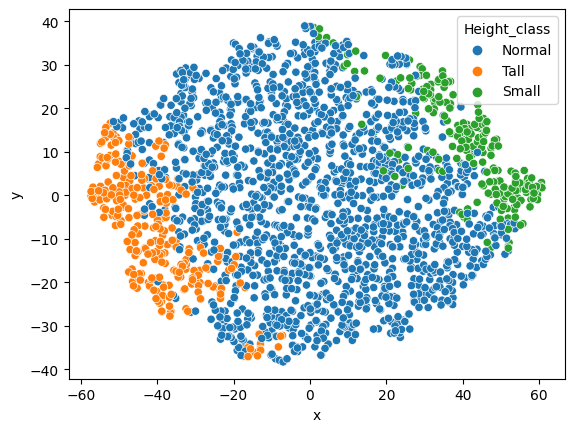

In [7]:
sns.scatterplot(x='x', y='y', hue='Height_class', data=df)
plt.show()

In [8]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

,Branch,Component,Gender,BMI_class,Height_class
0,Combat Support,Regular Army,Female,Overweight,Normal
1,Combat Service Support,Regular Army,Female,Normal,Normal
2,Combat Service Support,Regular Army,Female,Normal,Tall
3,Combat Service Support,Regular Army,Female,Overweight,Normal
4,Combat Arms,Regular Army,Female,Overweight,Normal


# Variance threshold

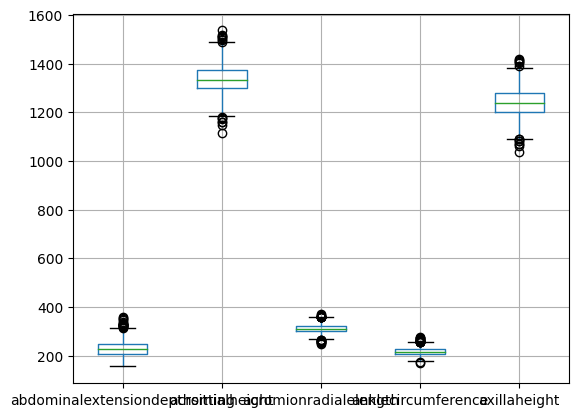

In [9]:
df_numeric.iloc[:,:5].boxplot()
plt.show()

In [10]:
normalized_df_numeric = df_numeric/df_numeric.mean()
normalized_df_numeric.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,1.005874,0.960231,0.967229,0.945584,0.952358,0.973214,0.972253,1.020942,1.030832,0.962314,...,0.983680,0.987333,1.018632,0.971458,0.961078,0.981959,0.951913,0.969624,0.957952,1.058875
1,0.844760,1.032885,1.028283,0.959490,1.042751,0.986365,0.977746,1.018205,0.890115,0.914747,...,0.846965,0.822390,0.788619,0.926404,1.052901,1.001340,1.026202,0.788096,1.022430,0.755512
2,0.796861,1.025395,1.057203,1.080005,1.025803,1.038971,1.076619,1.086632,0.981744,1.009881,...,0.896983,0.844460,0.746371,1.033406,1.055962,1.046562,1.006056,0.978479,1.050677,0.888264
3,1.136507,1.015658,0.983296,0.991936,1.008854,1.052123,1.032676,1.051050,1.191183,1.009881,...,1.007022,1.072127,1.103127,1.044669,1.019233,1.117625,1.029980,1.154104,1.019360,1.113061
4,1.345520,0.975960,0.989722,0.991936,0.976571,0.951294,0.999718,1.034627,1.047194,1.229420,...,1.350476,1.350903,1.408248,1.070011,0.929450,0.981959,0.959468,1.307591,0.965321,1.406232


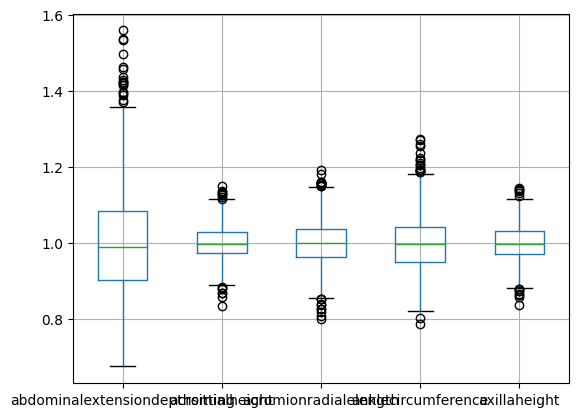

In [11]:
normalized_df_numeric.iloc[:,:5].boxplot()
plt.show()

# Correlation matrix

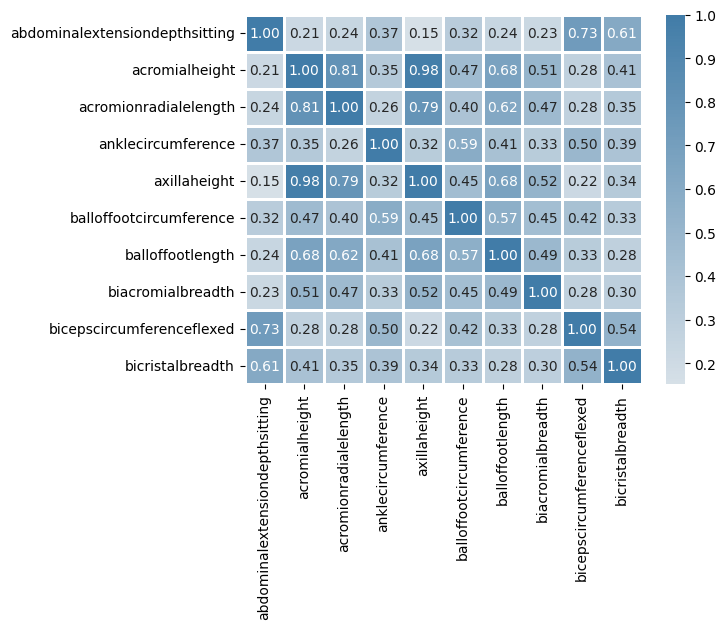

In [12]:
# Create the correlation matrix
corr = df_numeric.iloc[:, :10].corr()

# Draw a heatmap of the correlation matrix
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

sns.heatmap(corr,  cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

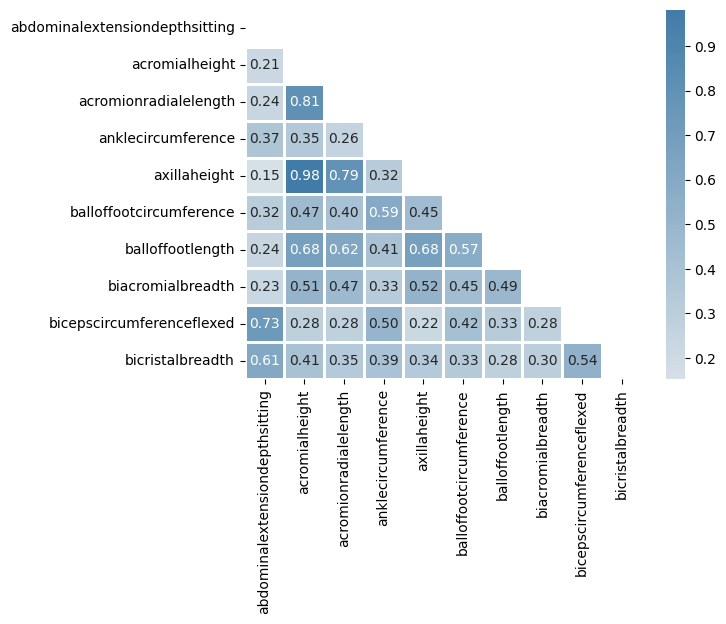

In [13]:
# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

# Filter out highly correlated matrix

In [14]:
# Calculate the correlation matrix and take the absolute value
corr_df = df_numeric.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

# Drop the features in the to_drop list
reduced_df = df_numeric.drop(to_drop, axis=1)

reduced_df.shape

(1986, 64)

In [15]:
reduced_df.head()

,anklecircumference,balloffootcircumference,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,...,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistdepth,waistfrontlengthsitting,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,204,222,373,315,263,466,65,338,301,141,...,844,1488,406,217,345,152,756,65.7,1.560,26.997041
1,207,225,372,272,250,430,64,294,270,126,...,901,1470,422,168,329,155,815,53.4,1.665,19.262506
2,233,237,397,300,276,450,69,309,270,128,...,882,1542,419,159,367,162,799,66.3,1.711,22.647148
3,214,240,384,364,276,484,68,340,294,144,...,866,1627,451,235,371,173,818,78.2,1.660,28.378575
4,214,217,378,320,336,525,67,300,295,135,...,800,1698,452,300,380,152,762,88.6,1.572,35.853259


# Selecting proportion of variance to keep

In [16]:
df_numeric.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,231,1282,301,204,1180,222,177,373,315,263,...,295,850,217,345,942,152,756,65.7,1.560,26.997041
1,194,1379,320,207,1292,225,178,372,272,250,...,254,708,168,329,1032,155,815,53.4,1.665,19.262506
2,183,1369,329,233,1271,237,196,397,300,276,...,269,727,159,367,1035,162,799,66.3,1.711,22.647148
3,261,1356,306,214,1250,240,188,384,364,276,...,302,923,235,371,999,173,818,78.2,1.660,28.378575
4,309,1303,308,214,1210,217,182,378,320,336,...,405,1163,300,380,911,152,762,88.6,1.572,35.853259


In [17]:
# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.8))])

# Fit the pipe to the data
pipe.fit(df_numeric)

print(f'{len(pipe["reducer"].components_)} components selected')

11 components selected


In [18]:
# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(df_numeric)

print(f'{len(pipe["reducer"].components_)} components selected')

23 components selected


# Selecting number of components

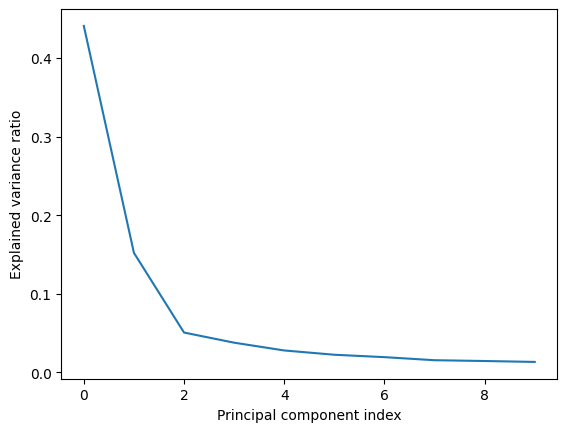

In [19]:
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(df_numeric)

# Plot the explained variance ratio
plt.plot(pipe['reducer'].explained_variance_ratio_)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()